# Práctica Clase 2

1) Abrir el archivo "Emisiones_CO2.csv" y cargar sus datos en un diccionario.

In [9]:
import os
import pandas as pd
import missingno as msno
data=pd.read_csv("C:/Users/santi/Desktop/Clase 02/Emisiones_CO2.csv",sep='|',decimal=',')
data['CO2']=data['CO2'].str.replace('.','')
data['CO2']=data['CO2'].str.replace(',','.').astype(float)
data["CO2pc"]=data["CO2pc"].astype(float)
data=data.dropna()
print(data.columns.tolist())
data




['codp', 'Nombre_del_pais', 'Region', 'Anio', 'CO2', 'CO2pc']


C:\Users\santi\AppData\Local\Temp\ipykernel_14132\2276046502.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['CO2']=data['CO2'].str.replace('.','')


,codp,Nombre_del_pais,Region,Anio,CO2,CO2pc
0,ABW,Aruba,Am�rica Latina y Caribe,1986,179.683,2.868319
1,ABW,Aruba,Am�rica Latina y Caribe,1987,447.374,7.234964
2,ABW,Aruba,Am�rica Latina y Caribe,1988,612.389,10.026508
3,ABW,Aruba,Am�rica Latina y Caribe,1989,649.059,10.634733
4,ABW,Aruba,Am�rica Latina y Caribe,1990,1840.830,29.620165
...,...,...,...,...,...,...
11096,ZWE,Zimbabue,�frica subsahariana,2007,9732.220,0.731867
11097,ZWE,Zimbabue,�frica subsahariana,2008,7682.370,0.569255
11098,ZWE,Zimbabue,�frica subsahariana,2009,8239.750,0.600521
11099,ZWE,Zimbabue,�frica subsahariana,2010,9028.150,0.646073


In [55]:
#nos fijamos cuantos datos faltantes hay
data.isna().sum()


Nombre del paï¿½s    0
Regiï¿½n             0
Aï¿½o                0
CO2                  0
CO2pc                0
dtype: int64

In [52]:
#informacion del set de datos 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11101 entries, ABW to ZWE
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nombre del paï¿½s  11101 non-null  object 
 1   Regiï¿½n           11101 non-null  object 
 2   Aï¿½o              11101 non-null  int64  
 3   CO2                9032 non-null   float64
 4   CO2pc              9029 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 520.4+ KB


<AxesSubplot: >

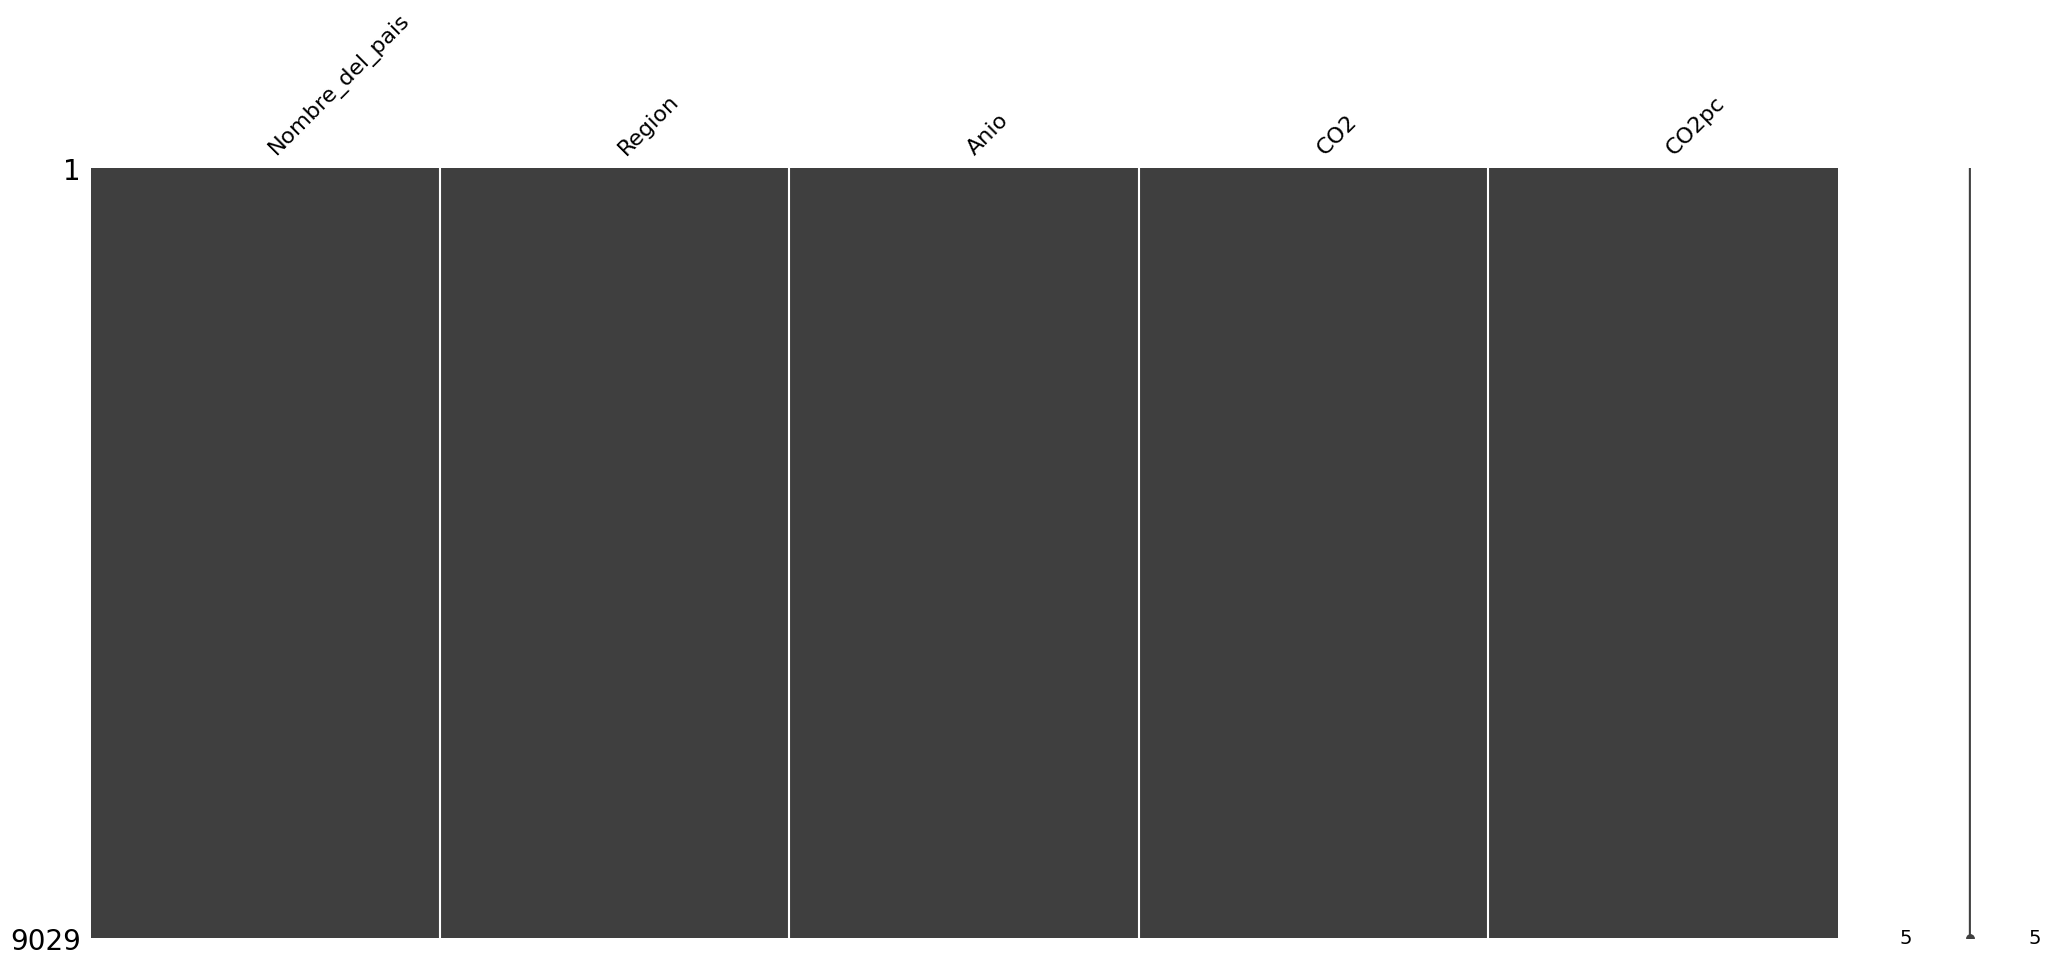

In [79]:
msno.matrix(data)

<AxesSubplot: >

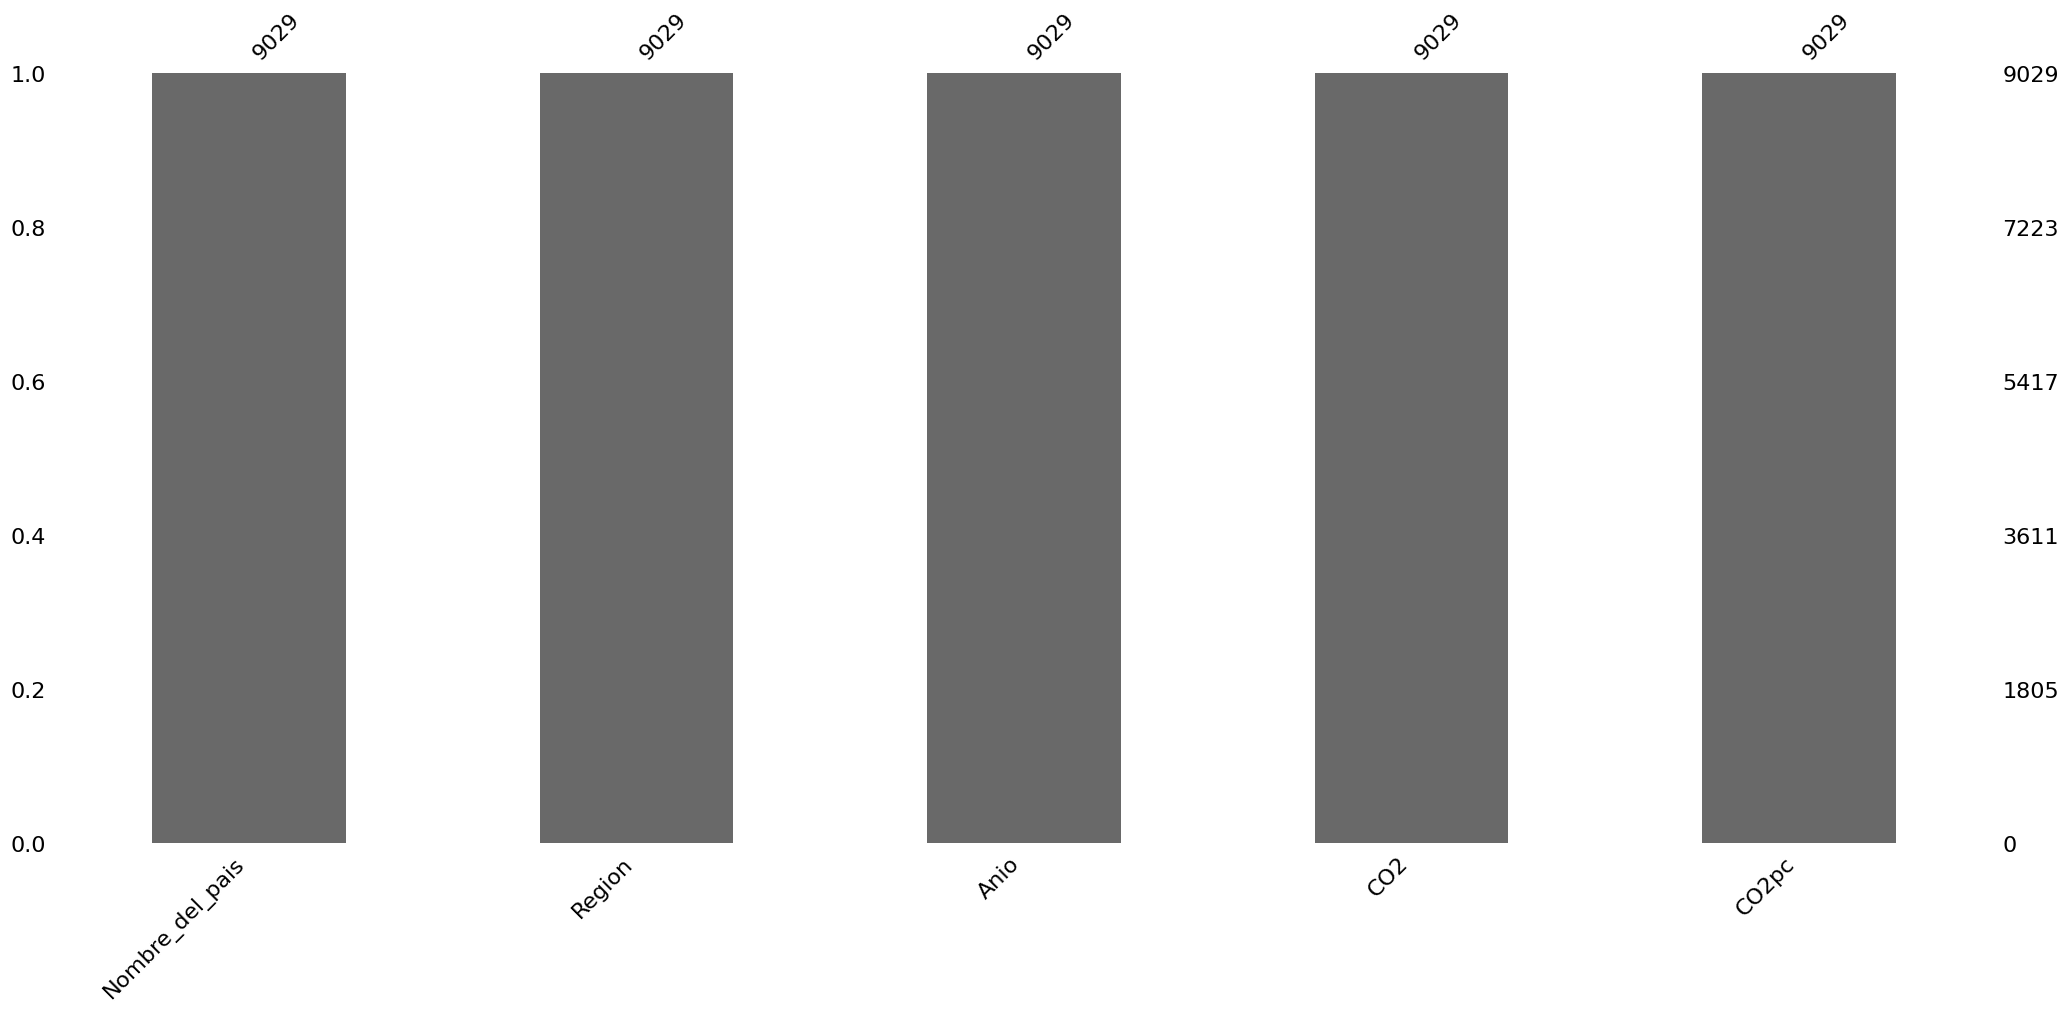

In [80]:
msno.bar(data)

In [138]:
dicc_emisiones = {  'cod_pais' : [],
                    'nom_pais' : [],
                    'region' : [],
                    'anio' : [],
                    'co2' : [],
                    'co2_percapita' : []}
data=data.sort_values('Region')
paises=[]
anios=[]
data['Anio']=data['Anio'].astype(str)

for i in range(len(data)):

    if data.iloc[i]['Region']!=data.iloc[i-1]['Region']:
        dicc_emisiones['region'].append(data.iloc[i]['Region'])
    for pais in data.iloc[i]['Nombre_del_pais']:        
        if data.iloc[i]['Nombre_del_pais'] not in paises:
            
            paises.append(data.iloc[i]['Nombre_del_pais'])
            dicc_emisiones['cod_pais'].append(data.iloc[i]['codp'])
    for anio in data.iloc[i]['Anio']:
        if data.iloc[i]['Anio'] not in anios:
            anios.append(data.iloc[i]['Anio'])
    dicc_emisiones['co2'].append(data.iloc[i]['CO2'])
    dicc_emisiones['co2_percapita'].append(data.iloc[i]['CO2pc'])
            

        
        
dicc_emisiones['anio']=anios    
dicc_emisiones['nom_pais']=paises     

    
print(dicc_emisiones)

                    

{'cod_pais': ['ABW', 'CRI', 'CUB', 'COL', 'MEX', 'NIC', 'CYM', 'LCA', 'CHL', 'PER', 'BRB', 'PAN', 'BRA', 'DOM', 'GRD', 'GUY', 'HND', 'DMA', 'HTI', 'JAM', 'GTM', 'KNA', 'ECU', 'VCT', 'VEN', 'SLV', 'ATG', 'BHS', 'TCA', 'ARG', 'SUR', 'BLZ', 'URY', 'TTO', 'BOL', 'PRY', 'KHM', 'PRK', 'KIR', 'KOR', 'LAO', 'IDN', 'HKG', 'VNM', 'VUT', 'WSM', 'JPN', 'MNG', 'PYF', 'NZL', 'NCL', 'MAC', 'PNG', 'MYS', 'PLW', 'MMR', 'TLS', 'PHL', 'THA', 'TON', 'SLB', 'SGP', 'MHL', 'CHN', 'AUS', 'BRN', 'FJI', 'FSM', 'NLD', 'DNK', 'ROU', 'RUS', 'ESP', 'LTU', 'BEL', 'ALB', 'KGZ', 'SWE', 'SVK', 'KAZ', 'NOR', 'EST', 'SVN', 'BGR', 'CHE', 'TUR', 'AUT', 'TJK', 'UZB', 'CYP', 'UKR', 'CZE', 'MDA', 'ARM', 'MNE', 'MKD', 'AZE', 'LVA', 'LIE', 'TKM', 'DEU', 'LUX', 'GRL', 'BLR', 'GBR', 'POL', 'AND', 'FRO', 'SRB', 'GEO', 'FRA', 'IRL', 'HRV', 'HUN', 'GRC', 'PRT', 'BIH', 'ITA', 'ISL', 'FIN', 'CAN', 'USA', 'BMU', 'OMN', 'QAT', 'BHR', 'SYR', 'SAU', 'TUN', 'JOR', 'LBN', 'MLT', 'EGY', 'KWT', 'DZA', 'IRQ', 'ISR', 'DJI', 'YEM', 'PSE', 'IRN',

In [11]:
anio=2010
acum=0
region="Amï¿½rica Latina y Caribe"
for i in range(len(data)):
    
    if data.iloc[i]['Region']==region and data.iloc[i]["Anio"]==anio:
        acum+=data.iloc[i]['CO2']
print (acum)




0


2) a) ¿Cuántas variables hay? <br>
b) ¿Qué tipos de datos usar para cada una? <br>
c) ¿Qué tipo de variables son? <br>
d) ¿Hay valores faltantes? <br>
e) ¿Cuál es el total de emisiones de CO2 para 'América Latina y Caribe' en el año 2010?

a) hay 6 variables.
C)codigo:cualitativo nombre:cualitativo region:cualitativo anio:discreto co2:continuo co2percapita:continuo
